In [1]:
%run 'lib.ipynb'
%run 'data-generator.ipynb'

dg = DataGenerator('/d2/caches/tf-speech/train/audio')
dg.n_mels = 64
dg.msg_w = 64

In [9]:
x, y = dg.generate_val_set(1000)
print(np.argmax(y, axis=1))
print(len(y))

[ 1  1  7  2  5  7  7  4  4  7  3  2  6  6  4  4  6  7  7  6  7  5  8  2  7
  0  2  0  6  9  9  8  3  0  4  2  5  6  0  3  3  9  6  5  5  1  4  6  4  3
 10  5  9  3  7  9  5  2  4  3  4  1  4  8  0  6  5  0  2  4  3  0  8  6  1
  6  2  9  9  2 10  5 10  5  3  3  4  7  1  6  5  2  6  5  7 10 10 10  2  5
  4  5  1  1  3  6  7  8  2  2  8  2  8  8  6  0  9  0  3  9  2  2  8  6  4
  2  7  3  3  0  0  9  9  6  8  1  9  2  6  2  0  2  0  7  4  2  4  6  3  8
  5  1  6  1  4  1  0  5  8  1  7  1  6  6  1  5  3  3  0  4  2  4 10  9  5
  3  9  7  2  0  7  4  8  3  7  0  5 10  2  4  2  3  9  0  7  4  5  9  5  0
  7  5  9  6  9  3  3  1  2  0  1  9 10  4  3  3  0  9  3  1 10  8  9  3  4
  3  9  3  2  0  2  9  7  5  9  5 10  2  5  4  2  9  3  1  3  8  2  3  5  5
  2  4  4  9 10  1  7  3  8  0  2  1  4  3 10  3  9 10  1  2  5  4  2  7  1
 10  7  5  6  1  6  3  8  1  0  2  4  5  9  7  2  1  1  8  0 10  7  8  4  3
  2  3 10  3  7  3  1  5  8  4  2 10  3  5  4 10  1  2  7  5  0  2  5  8  0
  8  5  9  3

In [10]:
print(x.nbytes/1024/1024, 'M')

15.625 M


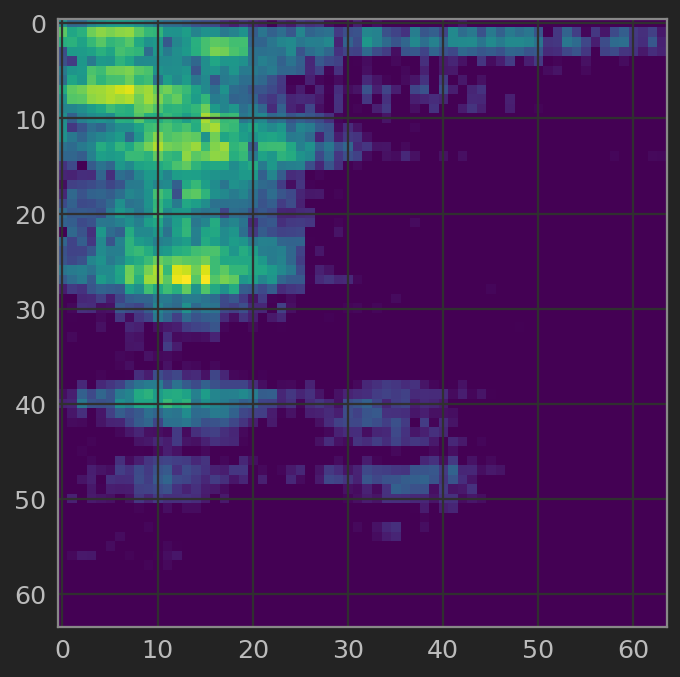

In [109]:
a, l = dg.generate_audio(label='left', transform=True)
m = dg.msg(a)
plt.imshow(m)
ipd.Audio(a, rate=16000)

file /d2/caches/tf-speech/train/audio/yes/dc2222d7_nohash_2.wav
mixing with /d2/caches/tf-speech/train/audio/_background_noise_/exercise_bike.wav at 0.23 vol
yes


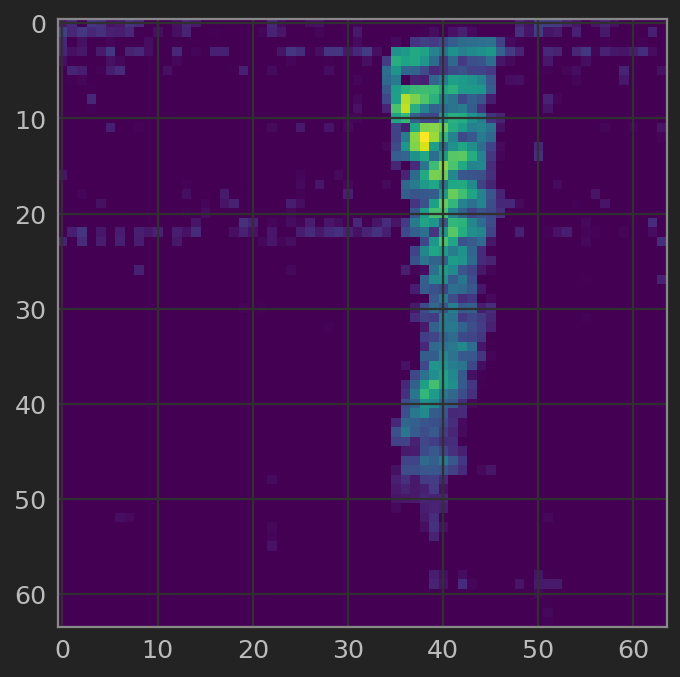

In [12]:
# try generating gen audio
dg.debug = True
a, a_label = dg.generate_audio()
print(a_label)
a_msg = dg.msg(a)
plt.imshow(a_msg)
ipd.Audio(a, rate=16000)

In [ ]:
# try mixing with noise
sr, s = wavfile.read(
    '/d2/caches/tf-speech/train/audio/go/4c4d2526_nohash_1.wav')
n = dg._load_random_segment(
    '/d2/caches/tf-speech/train/audio/_background_noise_/pink_noise.wav'
)[:len(s)]
s = dg.mix(s, 1., n, 0.05)
ipd.Audio(s, rate=sr)

In [8]:
# benchmark
from tqdm import tqdm
from collections import Counter
dg.debug = False
labels = Counter()

for i in tqdm(range(1000)):
    w, label = dg.generate_audio()
    labels[label] += 1

labels

100%|██████████| 1000/1000 [00:12<00:00, 78.05it/s]


Counter({'down': 86,
         'go': 74,
         'left': 92,
         'no': 83,
         'off': 76,
         'on': 82,
         'right': 89,
         'silence': 71,
         'stop': 96,
         'unknown': 92,
         'up': 76,
         'yes': 83})

(array([  3.64300000e+03,   1.27000000e+02,   9.70000000e+01,
          7.40000000e+01,   4.80000000e+01,   5.50000000e+01,
          2.70000000e+01,   1.40000000e+01,   8.00000000e+00,
          3.00000000e+00]),
 array([ 110.74069214,  118.74069214,  126.74069214,  134.74069214,
         142.74069214,  150.74069214,  158.74069214,  166.74069214,
         174.74069214,  182.74069214,  190.74069214]),
 <a list of 10 Patch objects>)

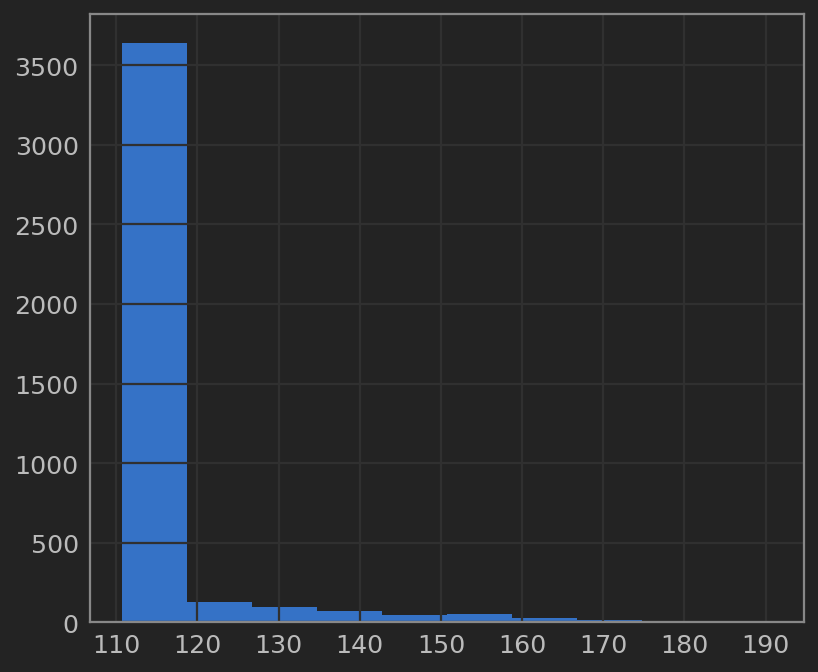

In [13]:
plt.hist(a_msg.flatten())

In [9]:
dg.debug = False
dg.compute_msg_norm_params(100)

In [14]:
a_msg_norm = dg.normalize_msg(a_msg)

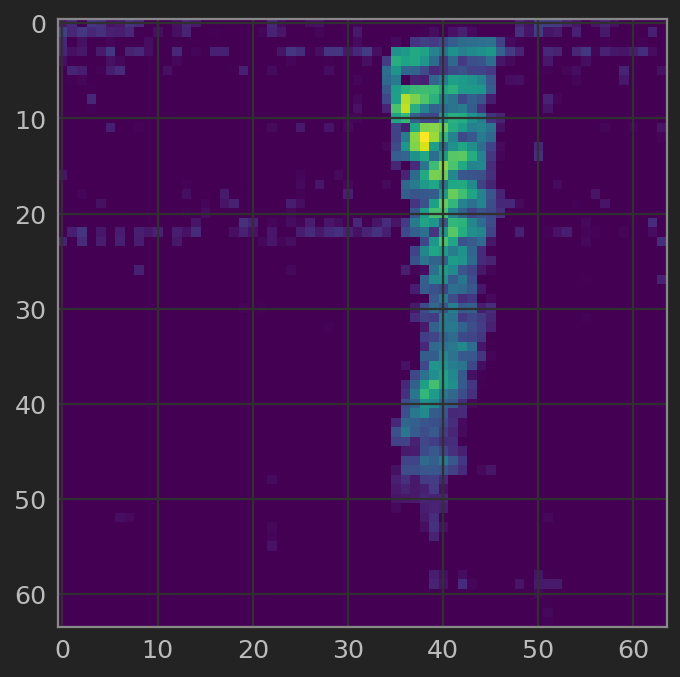

In [15]:
plt.imshow(a_msg_norm)

(array([  3.64300000e+03,   1.27000000e+02,   9.70000000e+01,
          7.40000000e+01,   4.80000000e+01,   5.50000000e+01,
          2.70000000e+01,   1.40000000e+01,   8.00000000e+00,
          3.00000000e+00]),
 array([-0.33076856,  0.46421917,  1.25920689,  2.05419461,  2.84918234,
         3.64417006,  4.43915778,  5.23414551,  6.02913323,  6.82412095,
         7.61910868]),
 <a list of 10 Patch objects>)

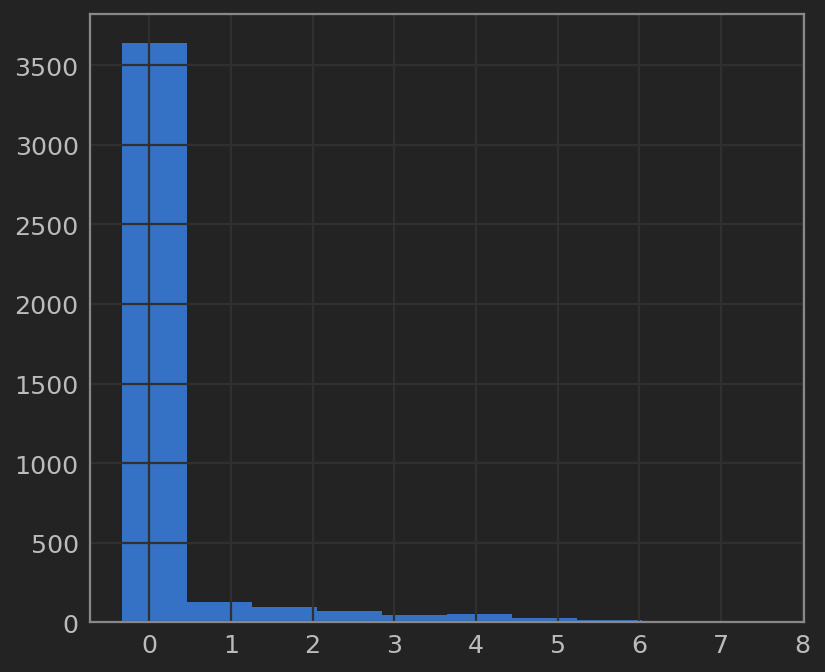

In [16]:
plt.hist(a_msg.flatten())